# Multi-Agent Systems 

> Note **Content will be available in the following weeks.**

When stepping into the world of multi-agent systems, it’s easy to get caught up in the complex web of orchestrating multiple agents right from the start. The secret, however, lies in building robust single-agent solutions first. These single agents are the foundational building blocks for scalability, security, and reliability in any agentic system.

### Why Start with Single Agents?

`Azure AI Agent Service` makes it straightforward to design agents that are solid, context-aware, and capable of achieving specific goals autonomously. Once these agents are successfully handling their tasks as singletons, you can gradually elevate them into more complex multi-agent architectures.

### The Power Duo (Framework): Semantic Kernel and AutoGen

- **AutoGen**:  
  Ideal for creativity and experimentation. It functions as a state-of-the-art research SDK, enabling you to test new ideas, experiment with collaboration patterns, and push the boundaries of agent capabilities.  

- **Semantic Kernel**:  
  Provides the enterprise-grade orchestration framework for seamless, non-breaking changes once you have validated your ideas. It’s designed for production-scale reliability and supports teams that need to move quickly without sacrificing stability.

### My opinionated Flow of Building Multi-Agent Architectures

1. **Start with Azure AI Agent Service**  
   Build single-agent solutions that are reliable and context-aware.

2. **Expand to Multi-Agent Orchestration**  
   Use AutoGen to explore, iterate, and discover the best collaboration patterns among agents.

3. **Move to Semantic Kernel**  
   Integrate proven ideas into Semantic Kernel for maximum performance, reliability, and enterprise support.


My Formula (and Mental Models)

Multi-Agent Architecture = Σ (Production Ready SingleAgent (Tools, Memory, Tracebility, Isolated Execution)) + Preferred Framework (Semantic Kernel, Autogen..)

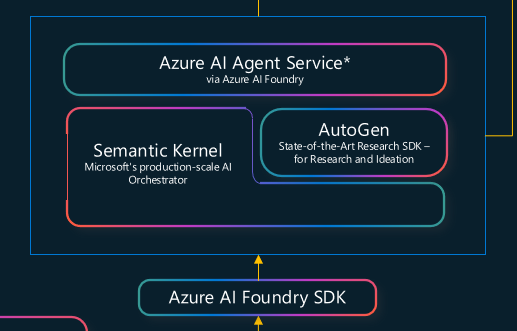


In [ ]:
> Note **Content will be available in the following weeks.**